In [1]:
# https://github.com/alistairewj/tree-prediction-tutorial

In [2]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.Series.__unicode__ = pd.Series.to_string

In [36]:
# reading file
df = pd.read_csv(r"C:\Users\simon\Desktop\Python\PhysionetChallenge2012-set-a.csv")
pd.set_option('display.max_columns', None)
df.head()

,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,HR_first,MAP_first,NIDiasABP_first,NIMAP_first,NISysABP_first,RespRate_first,SaO2_first,Temp_first,DiasABP_last,GCS_last,Glucose_last,HR_last,MAP_last,NIDiasABP_last,NIMAP_last,NISysABP_last,RespRate_last,SaO2_last,Temp_last,DiasABP_lowest,GCS_lowest,Glucose_lowest,HR_lowest,MAP_lowest,NIDiasABP_lowest,NIMAP_lowest,NISysABP_lowest,RespRate_lowest,SaO2_lowest,Temp_lowest,DiasABP_highest,GCS_highest,Glucose_highest,HR_highest,MAP_highest,NIDiasABP_highest,NIMAP_highest,NISysABP_highest,RespRate_highest,SaO2_highest,Temp_highest,DiasABP_median,GCS_median,Glucose_median,HR_median,MAP_median,NIDiasABP_median,NIMAP_median,NISysABP_median,RespRate_median,SaO2_median,Temp_median,ALP_first,ALT_first,AST_first,Albumin_first,BUN_first,Bilirubin_first,Cholesterol_first,Creatinine_first,FiO2_first,HCO3_first,HCT_first,K_first,Lactate_first,Mg_first,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,TroponinI_first,TroponinT_first,WBC_first,Weight_first,pH_first,ALP_last,ALT_last,AST_last,Albumin_last,BUN_last,Bilirubin_last,Cholesterol_last,Creatinine_last,FiO2_last,HCO3_last,HCT_last,K_last,Lactate_last,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,132539,6,1,5,-1,0,54,0.0,NaN,NaN,0,0,1,NaN,15.0,205.0,73.0,NaN,65.0,92.33,147.0,19.0,NaN,35.1,NaN,15.0,115.0,86.0,NaN,55.0,79.33,128.0,23.0,NaN,37.8,NaN,14.0,115.0,58.0,NaN,39.0,58.67,96.0,12.0,NaN,35.1,NaN,15.0,205.0,86.0,NaN,67.0,92.33,157.0,24.0,NaN,38.2,NaN,15.0,160.0,73.0,NaN,49.0,70.000,110.0,18.0,NaN,37.70,NaN,NaN,NaN,NaN,13.0,NaN,NaN,0.8,NaN,26.0,33.7,4.4,NaN,1.5,137.0,NaN,NaN,221.0,NaN,NaN,NaN,11.2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,0.7,NaN,28.0,30.3,4.0,NaN,1.9,136.0,NaN,NaN,185.0,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,8,-1,0,76,1.0,175.3,76.0,0,1,0,67.0,3.0,105.0,88.0,79.0,38.0,49.33,72.0,NaN,99.0,35.2,51.0,15.0,146.0,65.0,69.0,49.0,68.33,107.0,NaN,97.0,37.1,32.0,3.0,105.0,65.0,43.0,38.0,49.33,72.0,NaN,93.0,34.5,81.0,15.0,146.0,90.0,100.0,67.0,88.33,131.0,NaN,99.0,37.9,59.0,15.0,125.5,80.0,79.0,59.0,78.165,115.0,NaN,97.0,37.45,NaN,NaN,NaN,NaN,16.0,NaN,NaN,0.8,1.0,21.0,24.7,4.3,NaN,3.1,139.0,34.0,344.0,164.0,105.0,NaN,NaN,7.4,80.6,7.45,NaN,NaN,NaN,NaN,21.0,NaN,NaN,1.3,0.4,24.0,29.4,3.5,NaN,1.9,135.0,46.0,140.0,135.0,103.0,NaN,NaN,13.3,81.6,7.37,71.0,360.0,0.0,5.0
2,132541,21,11,19,-1,0,44,0.0,NaN,56.7,0,0,0,81.0,7.0,141.0,100.0,107.0,84.0,100.30,133.0,NaN,95.0,37.8,70.0,5.0,143.0,71.0,92.0,84.0,103.00,141.0,NaN,95.0,37.2,52.0,5.0,119.0,57.0,72.0,66.0,83.33,111.0,NaN,95.0,36.7,81.0,8.0,143.0,113.0,107.0,95.0,110.00,150.0,NaN,95.0,39.0,67.0,5.0,141.0,85.5,90.0,79.0,97.670,134.0,NaN,95.0,37.85,127.0,91.0,235.0,2.7,8.0,3.0,NaN,0.4,1.0,24.0,28.5,3.3,1.3,1.9,137.0,37.0,65.0,72.0,148.0,NaN,NaN,4.2,56.7,7.51,105.0,75.0,164.0,2.3,3.0,2.8,NaN,0.3,0.4,25.0,29.4,3.7,0.9,1.7,138.0,37.0,173.0,113.0,126.0,NaN,NaN,6.2,56.7,7.47,617.0,2160.0,1.0,14.0
3,132543,7,1,9,575,0,68,1.0,180.3,84.6,0,0,0,NaN,15.0,129.0,79.0,NaN,63.0,86.67,134.0,19.0,NaN,36.3,NaN,15.0,117.0,79.0,NaN,81.0,98.67,134.0,22.0,NaN,37.0,NaN,14.0,106.0,57.0,NaN,45.0,68.33,102.0,6.0,NaN,35.1,NaN,15.0,129.0,88.0,NaN,81.0,100.70,140.0,24.0,NaN,37.0,NaN,15.0,117.0,74.0,NaN,64.0,83.670,120.0,16.0,NaN,36.40,105.0,12.0,15.0,4.4,23.0,0.2,NaN,0.9,NaN,28.0,41.3,4.0,NaN,2.1,140.0,NaN,NaN,391.0,NaN,NaN,NaN,11.5,84.6,NaN,105.0,12.0,15.0,4.4,10.0,0.2,NaN,0.7,NaN,28.0,36.3,3.8,NaN,1.9,137.0,NaN,NaN,284.0,NaN,NaN,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,4,918,0,88,0.0,NaN,NaN,0,0,0,NaN,15.0,113.0,93.0,NaN,41.0,75.33,144.0,24.0,NaN,37.8,NaN,15.0,92.0,68.0,NaN,42.0,73.00,135.0,16.0,NaN,36.7,NaN,15.0,92.0,65.0,NaN,26.0,52.33,105.0,13.0,NaN,35.8,NaN,15.0,113.0,94.0,NaN,96.0,105.70,157.0,27.0,NaN,37.8,NaN,15.0,102.5,73.0,NaN,42.0,75.330,131.0,

In [37]:
# df.describe(include = 'all')
df.describe().style.background_gradient(cmap='Greys')

,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,HR_first,MAP_first,NIDiasABP_first,NIMAP_first,NISysABP_first,RespRate_first,SaO2_first,Temp_first,DiasABP_last,GCS_last,Glucose_last,HR_last,MAP_last,NIDiasABP_last,NIMAP_last,NISysABP_last,RespRate_last,SaO2_last,Temp_last,DiasABP_lowest,GCS_lowest,Glucose_lowest,HR_lowest,MAP_lowest,NIDiasABP_lowest,NIMAP_lowest,NISysABP_lowest,RespRate_lowest,SaO2_lowest,Temp_lowest,DiasABP_highest,GCS_highest,Glucose_highest,HR_highest,MAP_highest,NIDiasABP_highest,NIMAP_highest,NISysABP_highest,RespRate_highest,SaO2_highest,Temp_highest,DiasABP_median,GCS_median,Glucose_median,HR_median,MAP_median,NIDiasABP_median,NIMAP_median,NISysABP_median,RespRate_median,SaO2_median,Temp_median,ALP_first,ALT_first,AST_first,Albumin_first,BUN_first,Bilirubin_first,Cholesterol_first,Creatinine_first,FiO2_first,HCO3_first,HCT_first,K_first,Lactate_first,Mg_first,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,TroponinI_first,TroponinT_first,WBC_first,Weight_first,pH_first,ALP_last,ALT_last,AST_last,Albumin_last,BUN_last,Bilirubin_last,Cholesterol_last,Creatinine_last,FiO2_last,HCO3_last,HCT_last,K_last,Lactate_last,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3997.000000,2106.000000,3669.000000,4000.000000,4000.000000,4000.000000,2779.000000,3936.000000,3887.000000,3937.000000,2792.000000,3482.000000,3480.000000,3485.000000,1101.000000,1792.000000,3936.000000,2779.000000,3936.000000,3887.000000,3937.000000,2792.000000,3482.000000,3480.000000,3485.000000,1101.000000,1792.000000,3936.000000,2779.000000,3936.000000,3887.000000,3937.000000,2792.000000,3482.000000,3480.000000,3485.000000,1101.000000,1792.000000,3936.000000,2779.000000,3936.000000,3887.000000,3937.000000,2792.000000,3482.000000,3480.000000,3485.000000,1101.000000,1792.000000,3936.000000,2779.000000,3936.000000,3887.000000,3937.000000,2792.000000,3482.000000,3480.000000,3485.000000,1101.000000,1792.000000,3936.000000,1690.000000,1721.000000,1725.000000,1615.000000,3936.000000,1718.000000,305.000000,3936.000000,2717.000000,3924.000000,3936.000000,3904.000000,2183.000000,3897.000000,3925.000000,3023.000000,3023.000000,3932.000000,2780.000000,205.000000,863.000000,3908.000000,2718.000000,3038.000000,1690.000000,1721.000000,1725.000000,1615.000000,3936.000000,1718.000000,305.000000,3936.000000,2717.000000,3924.000000,3936.000000,3904.000000,2183.000000,3897.000000,3925.000000,3023.000000,3023.000000,3932.000000,2780.000000,205.000000,863.000000,3908.000000,2718.000000,3038.000000,2529.000000,2529.000000,2529.000000,2529.000000
mean,137605.122000,14.203500,6.402500,13.441750,128.735500,0.138500,64.247500,0.561921,171.985856,81.474832,0.144250,0.218500,0.267000,62.370637,10.031250,149.448932,89.626670,84.759312,60.327111,79.329799,121.248494,20.161671,96.629688,36.570574,61.210148,12.370935,128.435297,85.998476,82.361032,57.536186,76.832445,119.194835,19.897366,96.494978,37.046265,44.494063,8.222561,108.587857,68.623343,58.439470,40.814474,59.692681,94.309613,12.345141,94.827790,35.887688,83.590140,13.528201,173.592745,112.397562,118.431948,79.304997,96.761922,144.191105,29.300636,97.643973,37.929187,59.591220,11.995808,133.547852,86.383541,80.036891,56.786760,75.899545,117.635581,19.449137,96.765904,37.054060,105.868639,155.802440,226.927536,2.989040,25.892022,1.886321,156.609836,1.367683,0.786441,23.150102,31.929802,4.178356,2.582666,1.938542,138.789809,41.523321,204.102216,215.928535,123.896763,7.185366,1.072048,12.914785,84.411626,7.368120,104.302367,175.110982,222.487536,2.952570,25.399390,1.936380,156.537705,1.368928,0.499838,24.267329,30.862144,4.067085,1.943784,2.048473,138.844841,40.073106,117.419120,192.542

In [38]:
# column names
list(df.columns)

['recordid',
 'SAPS-I',
 'SOFA',
 'Length_of_stay',
 'Survival',
 'In-hospital_death',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'CCU',
 'CSRU',
 'SICU',
 'DiasABP_first',
 'GCS_first',
 'Glucose_first',
 'HR_first',
 'MAP_first',
 'NIDiasABP_first',
 'NIMAP_first',
 'NISysABP_first',
 'RespRate_first',
 'SaO2_first',
 'Temp_first',
 'DiasABP_last',
 'GCS_last',
 'Glucose_last',
 'HR_last',
 'MAP_last',
 'NIDiasABP_last',
 'NIMAP_last',
 'NISysABP_last',
 'RespRate_last',
 'SaO2_last',
 'Temp_last',
 'DiasABP_lowest',
 'GCS_lowest',
 'Glucose_lowest',
 'HR_lowest',
 'MAP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NISysABP_lowest',
 'RespRate_lowest',
 'SaO2_lowest',
 'Temp_lowest',
 'DiasABP_highest',
 'GCS_highest',
 'Glucose_highest',
 'HR_highest',
 'MAP_highest',
 'NIDiasABP_highest',
 'NIMAP_highest',
 'NISysABP_highest',
 'RespRate_highest',
 'SaO2_highest',
 'Temp_highest',
 'DiasABP_median',
 'GCS_median',
 'Glucose_median',
 'HR_median',
 'MAP_median',
 'NIDiasABP_median

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 120 entries, recordid to UrineOutputSum
dtypes: float64(110), int64(10)
memory usage: 3.7 MB


In [40]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.background_gradient(cmap='Greys')

,Total,Percentage
TroponinI_last,3795,94.875000
TroponinI_first,3795,94.875000
Cholesterol_first,3695,92.375000
Cholesterol_last,3695,92.375000
TroponinT_first,3137,78.425000
TroponinT_last,3137,78.425000
RespRate_last,2899,72.475000
RespRate_lowest,2899,72.475000
RespRate_first,2899,72.475000
RespRate_median,2899,72.475000


In [41]:
# Dropping columns with many null values (over 50% null)

df=df.drop(columns=["TroponinI_last", "TroponinI_first", "Cholesterol_first","Cholesterol_last", "TroponinT_first",
                   "TroponinT_last", "RespRate_last", "RespRate_lowest", "RespRate_first", "RespRate_median", "RespRate_highest",
                   "Albumin_last","Albumin_first","ALP_last","ALP_first","Bilirubin_last","Bilirubin_first","ALT_first",
                    "AST_first","AST_last","SaO2_lowest","SaO2_highest","SaO2_last","SaO2_first","SaO2_median"])
df.head()

,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,HR_first,MAP_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,DiasABP_last,GCS_last,Glucose_last,HR_last,MAP_last,NIDiasABP_last,NIMAP_last,NISysABP_last,Temp_last,DiasABP_lowest,GCS_lowest,Glucose_lowest,HR_lowest,MAP_lowest,NIDiasABP_lowest,NIMAP_lowest,NISysABP_lowest,Temp_lowest,DiasABP_highest,GCS_highest,Glucose_highest,HR_highest,MAP_highest,NIDiasABP_highest,NIMAP_highest,NISysABP_highest,Temp_highest,DiasABP_median,GCS_median,Glucose_median,HR_median,MAP_median,NIDiasABP_median,NIMAP_median,NISysABP_median,Temp_median,BUN_first,Creatinine_first,FiO2_first,HCO3_first,HCT_first,K_first,Lactate_first,Mg_first,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,WBC_first,Weight_first,pH_first,ALT_last,BUN_last,Creatinine_last,FiO2_last,HCO3_last,HCT_last,K_last,Lactate_last,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,132539,6,1,5,-1,0,54,0.0,NaN,NaN,0,0,1,NaN,15.0,205.0,73.0,NaN,65.0,92.33,147.0,35.1,NaN,15.0,115.0,86.0,NaN,55.0,79.33,128.0,37.8,NaN,14.0,115.0,58.0,NaN,39.0,58.67,96.0,35.1,NaN,15.0,205.0,86.0,NaN,67.0,92.33,157.0,38.2,NaN,15.0,160.0,73.0,NaN,49.0,70.000,110.0,37.70,13.0,0.8,NaN,26.0,33.7,4.4,NaN,1.5,137.0,NaN,NaN,221.0,NaN,11.2,NaN,NaN,NaN,8.0,0.7,NaN,28.0,30.3,4.0,NaN,1.9,136.0,NaN,NaN,185.0,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,8,-1,0,76,1.0,175.3,76.0,0,1,0,67.0,3.0,105.0,88.0,79.0,38.0,49.33,72.0,35.2,51.0,15.0,146.0,65.0,69.0,49.0,68.33,107.0,37.1,32.0,3.0,105.0,65.0,43.0,38.0,49.33,72.0,34.5,81.0,15.0,146.0,90.0,100.0,67.0,88.33,131.0,37.9,59.0,15.0,125.5,80.0,79.0,59.0,78.165,115.0,37.45,16.0,0.8,1.0,21.0,24.7,4.3,NaN,3.1,139.0,34.0,344.0,164.0,105.0,7.4,80.6,7.45,NaN,21.0,1.3,0.4,24.0,29.4,3.5,NaN,1.9,135.0,46.0,140.0,135.0,103.0,13.3,81.6,7.37,71.0,360.0,0.0,5.0
2,132541,21,11,19,-1,0,44,0.0,NaN,56.7,0,0,0,81.0,7.0,141.0,100.0,107.0,84.0,100.30,133.0,37.8,70.0,5.0,143.0,71.0,92.0,84.0,103.00,141.0,37.2,52.0,5.0,119.0,57.0,72.0,66.0,83.33,111.0,36.7,81.0,8.0,143.0,113.0,107.0,95.0,110.00,150.0,39.0,67.0,5.0,141.0,85.5,90.0,79.0,97.670,134.0,37.85,8.0,0.4,1.0,24.0,28.5,3.3,1.3,1.9,137.0,37.0,65.0,72.0,148.0,4.2,56.7,7.51,75.0,3.0,0.3,0.4,25.0,29.4,3.7,0.9,1.7,138.0,37.0,173.0,113.0,126.0,6.2,56.7,7.47,617.0,2160.0,1.0,14.0
3,132543,7,1,9,575,0,68,1.0,180.3,84.6,0,0,0,NaN,15.0,129.0,79.0,NaN,63.0,86.67,134.0,36.3,NaN,15.0,117.0,79.0,NaN,81.0,98.67,134.0,37.0,NaN,14.0,106.0,57.0,NaN,45.0,68.33,102.0,35.1,NaN,15.0,129.0,88.0,NaN,81.0,100.70,140.0,37.0,NaN,15.0,117.0,74.0,NaN,64.0,83.670,120.0,36.40,23.0,0.9,NaN,28.0,41.3,4.0,NaN,2.1,140.0,NaN,NaN,391.0,NaN,11.5,84.6,NaN,12.0,10.0,0.7,NaN,28.0,36.3,3.8,NaN,1.9,137.0,NaN,NaN,284.0,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,4,918,0,88,0.0,NaN,NaN,0,0,0,NaN,15.0,113.0,93.0,NaN,41.0,75.33,144.0,37.8,NaN,15.0,92.0,68.0,NaN,42.0,73.00,135.0,36.7,NaN,15.0,92.0,65.0,NaN,26.0,52.33,105.0,35.8,NaN,15.0,113.0,94.0,NaN,96.0,105.70,157.0,37.8,NaN,15.0,102.5,73.0,NaN,42.0,75.330,131.0,37.00,45.0,1.0,NaN,18.0,22.6,6.0,NaN,1.5,140.0,NaN,NaN,109.0,NaN,3.8,NaN,NaN,NaN,25.0,1.0,NaN,20.0,30.9,4.1,NaN,1.6,139.0,NaN,NaN,97.0,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# New BMI column
df['bmi'] = round((df['Weight'] / (df['Height']/100)**2),2)

df.head()

,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,HR_first,MAP_first,NIDiasABP_first,NIMAP_first,NISysABP_first,Temp_first,DiasABP_last,GCS_last,Glucose_last,HR_last,MAP_last,NIDiasABP_last,NIMAP_last,NISysABP_last,Temp_last,DiasABP_lowest,GCS_lowest,Glucose_lowest,HR_lowest,MAP_lowest,NIDiasABP_lowest,NIMAP_lowest,NISysABP_lowest,Temp_lowest,DiasABP_highest,GCS_highest,Glucose_highest,HR_highest,MAP_highest,NIDiasABP_highest,NIMAP_highest,NISysABP_highest,Temp_highest,DiasABP_median,GCS_median,Glucose_median,HR_median,MAP_median,NIDiasABP_median,NIMAP_median,NISysABP_median,Temp_median,BUN_first,Creatinine_first,FiO2_first,HCO3_first,HCT_first,K_first,Lactate_first,Mg_first,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,WBC_first,Weight_first,pH_first,ALT_last,BUN_last,Creatinine_last,FiO2_last,HCO3_last,HCT_last,K_last,Lactate_last,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum,bmi
0,132539,6,1,5,-1,0,54,0.0,NaN,NaN,0,0,1,NaN,15.0,205.0,73.0,NaN,65.0,92.33,147.0,35.1,NaN,15.0,115.0,86.0,NaN,55.0,79.33,128.0,37.8,NaN,14.0,115.0,58.0,NaN,39.0,58.67,96.0,35.1,NaN,15.0,205.0,86.0,NaN,67.0,92.33,157.0,38.2,NaN,15.0,160.0,73.0,NaN,49.0,70.000,110.0,37.70,13.0,0.8,NaN,26.0,33.7,4.4,NaN,1.5,137.0,NaN,NaN,221.0,NaN,11.2,NaN,NaN,NaN,8.0,0.7,NaN,28.0,30.3,4.0,NaN,1.9,136.0,NaN,NaN,185.0,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,8,-1,0,76,1.0,175.3,76.0,0,1,0,67.0,3.0,105.0,88.0,79.0,38.0,49.33,72.0,35.2,51.0,15.0,146.0,65.0,69.0,49.0,68.33,107.0,37.1,32.0,3.0,105.0,65.0,43.0,38.0,49.33,72.0,34.5,81.0,15.0,146.0,90.0,100.0,67.0,88.33,131.0,37.9,59.0,15.0,125.5,80.0,79.0,59.0,78.165,115.0,37.45,16.0,0.8,1.0,21.0,24.7,4.3,NaN,3.1,139.0,34.0,344.0,164.0,105.0,7.4,80.6,7.45,NaN,21.0,1.3,0.4,24.0,29.4,3.5,NaN,1.9,135.0,46.0,140.0,135.0,103.0,13.3,81.6,7.37,71.0,360.0,0.0,5.0,24.73
2,132541,21,11,19,-1,0,44,0.0,NaN,56.7,0,0,0,81.0,7.0,141.0,100.0,107.0,84.0,100.30,133.0,37.8,70.0,5.0,143.0,71.0,92.0,84.0,103.00,141.0,37.2,52.0,5.0,119.0,57.0,72.0,66.0,83.33,111.0,36.7,81.0,8.0,143.0,113.0,107.0,95.0,110.00,150.0,39.0,67.0,5.0,141.0,85.5,90.0,79.0,97.670,134.0,37.85,8.0,0.4,1.0,24.0,28.5,3.3,1.3,1.9,137.0,37.0,65.0,72.0,148.0,4.2,56.7,7.51,75.0,3.0,0.3,0.4,25.0,29.4,3.7,0.9,1.7,138.0,37.0,173.0,113.0,126.0,6.2,56.7,7.47,617.0,2160.0,1.0,14.0,NaN
3,132543,7,1,9,575,0,68,1.0,180.3,84.6,0,0,0,NaN,15.0,129.0,79.0,NaN,63.0,86.67,134.0,36.3,NaN,15.0,117.0,79.0,NaN,81.0,98.67,134.0,37.0,NaN,14.0,106.0,57.0,NaN,45.0,68.33,102.0,35.1,NaN,15.0,129.0,88.0,NaN,81.0,100.70,140.0,37.0,NaN,15.0,117.0,74.0,NaN,64.0,83.670,120.0,36.40,23.0,0.9,NaN,28.0,41.3,4.0,NaN,2.1,140.0,NaN,NaN,391.0,NaN,11.5,84.6,NaN,12.0,10.0,0.7,NaN,28.0,36.3,3.8,NaN,1.9,137.0,NaN,NaN,284.0,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN,26.02
4,132545,17,2,4,918,0,88,0.0,NaN,NaN,0,0,0,NaN,15.0,113.0,93.0,NaN,41.0,75.33,144.0,37.8,NaN,15.0,92.0,68.0,NaN,42.0,73.00,135.0,36.7,NaN,15.0,92.0,65.0,NaN,26.0,52.33,105.0,35.8,NaN,15.0,113.0,94.0,NaN,96.0,105.70,157.0,37.8,NaN,15.0,102.5,73.0,NaN,42.0,75.330,131.0,37.00,45.0,1.0,NaN,18.0,22.6,6.0,NaN,1.5,140.0,NaN,NaN,109.0,NaN,3.8,NaN,NaN,NaN,25.0,1.0,NaN,20.0,30.9,4.1,NaN,1.6,139.0,NaN,NaN,97.0,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#FILL THE MISSING BMI VALUES WITH THE MEDIAN VALUES
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [44]:
# Replace Gender value
df['Gender'] = df['Gender'].replace([0.0], 'Female')
df['Gender'] = df['Gender'].replace([1.0], 'Male')
df['Gender'].head()

0    Female
1      Male
2    Female
3      Male
4    Female
Name: Gender, dtype: object

In [87]:
df1 = df.groupby(['Gender'])['Age','Height','Weight',"bmi",'Glucose_first','Glucose_last','In-hospital_death'].mean().reset_index()
df1['Age'] = np.around(df1['Age'], 2)
df1['Height'] = np.around(df1['Height'], 2)
df1['Weight'] = np.around(df1['Weight'], 2)
df1['Glucose_last'] = np.around(df1['Glucose_last'], 2)
df1['Glucose_first'] = np.around(df1['Glucose_first'], 2)
df1['In-hospital_death'] = np.around(df1['In-hospital_death'], 3)


df1

C:\Users\simon\AppData\Local\Temp/ipykernel_20456/2408754022.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(['Gender'])['Age','Height','Weight',"bmi",'Glucose_first','Glucose_last','In-hospital_death'].mean().reset_index()


,Gender,Age,Height,Weight,bmi,Glucose_first,Glucose_last,In-hospital_death
0,Female,65.96,165.46,74.41,27.917636,151.04,127.56,0.144
1,Male,62.92,176.40,86.80,27.960272,148.24,129.09,0.134


[]

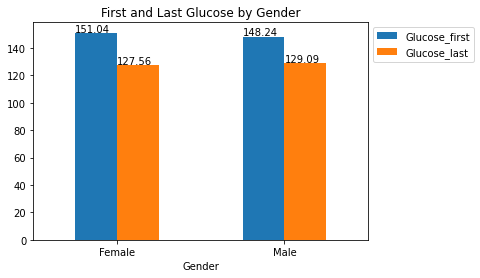

In [88]:
# df1.plot(x="Gender" , y='Age','Height','Weight','Glucose_first','Glucose_last' , kind="bar")
ax = df1.plot.bar(x="Gender" , y=["Glucose_first","Glucose_last"], rot=0)
ax.set_title("First and Last Glucose by Gender",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax.plot()

In [89]:
# we can see that women have higher first gloucose but they also improve their gloucose level a bit more than men on average

[]

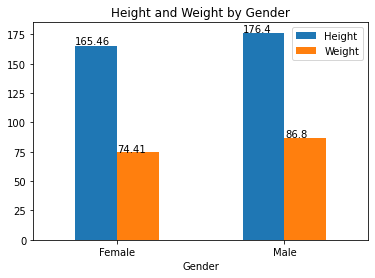

In [90]:
bx = df1.plot.bar(x="Gender" , y=["Height","Weight"], rot=0)
bx.set_title("Height and Weight by Gender",color='black')
bx.legend(bbox_to_anchor=(1.0, 1.0))

for p in bx.patches:
    bx.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
bx.plot()

[]

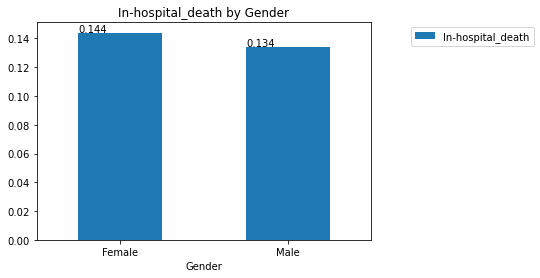

In [91]:
cx = df1.plot.bar(x="Gender" , y=["In-hospital_death"], rot=0)
cx.set_title("In-hospital_death by Gender",color='black')
cx.legend(bbox_to_anchor=(1.5, 1.0))

for p in cx.patches:
    cx.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

cx.plot()

In [ ]:
# In hospital death rate is higher for women

In [11]:
# round the age variable to 0 or 1 (nearest)
df_round = df.copy()
df_round['Age'] = df_round['Age'].round(-1)
df_round

,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,Glucose_first,HR_first,MAP_first,NIDiasABP_first,NIMAP_first,NISysABP_first,RespRate_first,SaO2_first,Temp_first,DiasABP_last,GCS_last,Glucose_last,HR_last,MAP_last,NIDiasABP_last,NIMAP_last,NISysABP_last,RespRate_last,SaO2_last,Temp_last,DiasABP_lowest,GCS_lowest,Glucose_lowest,HR_lowest,MAP_lowest,NIDiasABP_lowest,NIMAP_lowest,NISysABP_lowest,RespRate_lowest,SaO2_lowest,Temp_lowest,DiasABP_highest,GCS_highest,Glucose_highest,HR_highest,MAP_highest,NIDiasABP_highest,NIMAP_highest,NISysABP_highest,RespRate_highest,SaO2_highest,Temp_highest,DiasABP_median,GCS_median,Glucose_median,HR_median,MAP_median,NIDiasABP_median,NIMAP_median,NISysABP_median,RespRate_median,SaO2_median,Temp_median,ALP_first,ALT_first,AST_first,Albumin_first,BUN_first,Bilirubin_first,Cholesterol_first,Creatinine_first,FiO2_first,HCO3_first,HCT_first,K_first,Lactate_first,Mg_first,Na_first,PaCO2_first,PaO2_first,Platelets_first,SysABP_first,TroponinI_first,TroponinT_first,WBC_first,Weight_first,pH_first,ALP_last,ALT_last,AST_last,Albumin_last,BUN_last,Bilirubin_last,Cholesterol_last,Creatinine_last,FiO2_last,HCO3_last,HCT_last,K_last,Lactate_last,Mg_last,Na_last,PaCO2_last,PaO2_last,Platelets_last,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum,bmi
0,132539,6,1,5,-1,0,50,Female,NaN,NaN,0,0,1,NaN,15.0,205.0,73.0,NaN,65.0,92.33,147.0,19.0,NaN,35.1,NaN,15.0,115.0,86.0,NaN,55.0,79.33,128.0,23.0,NaN,37.8,NaN,14.0,115.0,58.0,NaN,39.0,58.67,96.0,12.0,NaN,35.1,NaN,15.0,205.0,86.0,NaN,67.0,92.33,157.0,24.0,NaN,38.2,NaN,15.0,160.0,73.0,NaN,49.0,70.000,110.0,18.0,NaN,37.70,NaN,NaN,NaN,NaN,13.0,NaN,NaN,0.8,NaN,26.0,33.7,4.4,NaN,1.5,137.0,NaN,NaN,221.0,NaN,NaN,NaN,11.2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,0.7,NaN,28.0,30.3,4.0,NaN,1.9,136.0,NaN,NaN,185.0,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,8,-1,0,80,Male,175.3,76.0,0,1,0,67.0,3.0,105.0,88.0,79.0,38.0,49.33,72.0,NaN,99.0,35.2,51.0,15.0,146.0,65.0,69.0,49.0,68.33,107.0,NaN,97.0,37.1,32.0,3.0,105.0,65.0,43.0,38.0,49.33,72.0,NaN,93.0,34.5,81.0,15.0,146.0,90.0,100.0,67.0,88.33,131.0,NaN,99.0,37.9,59.0,15.0,125.5,80.0,79.0,59.0,78.165,115.0,NaN,97.0,37.45,NaN,NaN,NaN,NaN,16.0,NaN,NaN,0.8,1.0,21.0,24.7,4.3,NaN,3.1,139.0,34.0,344.0,164.0,105.0,NaN,NaN,7.4,80.6,7.45,NaN,NaN,NaN,NaN,21.0,NaN,NaN,1.3,0.4,24.0,29.4,3.5,NaN,1.9,135.0,46.0,140.0,135.0,103.0,NaN,NaN,13.3,81.6,7.37,71.0,360.0,0.0,5.0,24.73
2,132541,21,11,19,-1,0,40,Female,NaN,56.7,0,0,0,81.0,7.0,141.0,100.0,107.0,84.0,100.30,133.0,NaN,95.0,37.8,70.0,5.0,143.0,71.0,92.0,84.0,103.00,141.0,NaN,95.0,37.2,52.0,5.0,119.0,57.0,72.0,66.0,83.33,111.0,NaN,95.0,36.7,81.0,8.0,143.0,113.0,107.0,95.0,110.00,150.0,NaN,95.0,39.0,67.0,5.0,141.0,85.5,90.0,79.0,97.670,134.0,NaN,95.0,37.85,127.0,91.0,235.0,2.7,8.0,3.0,NaN,0.4,1.0,24.0,28.5,3.3,1.3,1.9,137.0,37.0,65.0,72.0,148.0,NaN,NaN,4.2,56.7,7.51,105.0,75.0,164.0,2.3,3.0,2.8,NaN,0.3,0.4,25.0,29.4,3.7,0.9,1.7,138.0,37.0,173.0,113.0,126.0,NaN,NaN,6.2,56.7,7.47,617.0,2160.0,1.0,14.0,NaN
3,132543,7,1,9,575,0,70,Male,180.3,84.6,0,0,0,NaN,15.0,129.0,79.0,NaN,63.0,86.67,134.0,19.0,NaN,36.3,NaN,15.0,117.0,79.0,NaN,81.0,98.67,134.0,22.0,NaN,37.0,NaN,14.0,106.0,57.0,NaN,45.0,68.33,102.0,6.0,NaN,35.1,NaN,15.0,129.0,88.0,NaN,81.0,100.70,140.0,24.0,NaN,37.0,NaN,15.0,117.0,74.0,NaN,64.0,83.670,120.0,16.0,NaN,36.40,105.0,12.0,15.0,4.4,23.0,0.2,NaN,0.9,NaN,28.0,41.3,4.0,NaN,2.1,140.0,NaN,NaN,391.0,NaN,NaN,NaN,11.5,84.6,NaN,105.0,12.0,15.0,4.4,10.0,0.2,NaN,0.7,NaN,28.0,36.3,3.8,NaN,1.9,137.0,NaN,NaN,284.0,NaN,NaN,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN,26.02
4,132545,17,2,4,918,0,90,Female,NaN,NaN,0,0,0,NaN,15.0,113.0,93.0,NaN,41.0,75.33,144.0,24.0,NaN,37.8,NaN,15.0,92.0,68.0,NaN,42.0,73.00,135.0,16.0,NaN,36.7,NaN,15.0,92.0,65.0,NaN,26.0,52.33,105.0,13.0,NaN,35.8,NaN,15.0,113.0,94.0,NaN,96.0,105.70,157.0,27.0,NaN,37.8,NaN,15.

In [96]:
# age_count
age_count = df_round['Age'].value_counts().reset_index()

# sort by age
age_count = age_count.sort_values(by=['index'], ascending=True)
age_count = age_count.rename(columns={'index': 'Age', 'Age': 'Age_count'})
age_count

,Age,Age_count
7,20,137
6,30,138
5,40,350
3,50,492
1,60,777
2,70,743
0,80,993
4,90,370


<AxesSubplot:xlabel='Age'>

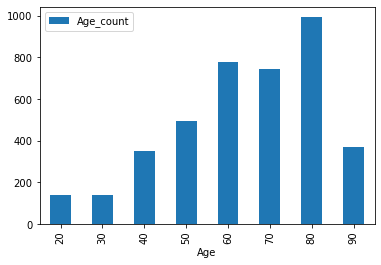

In [97]:
age_count.plot(x='Age', kind="bar")

In [98]:
# Age average
df['Age'].mean()

64.2475

In [99]:
# Age median
df['Age'].median()

67.0

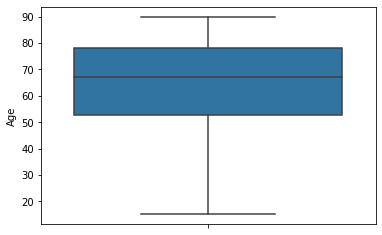

In [100]:
sns.boxplot( y=df["Age"] );
plt.show()

In [17]:
# most observations, between percentile 25% and 75% are in the age of 50-80.

In [103]:
df2 = df_round.groupby(['Age'])['Glucose_first','Glucose_last','In-hospital_death'].mean().reset_index()
df2

C:\Users\simon\AppData\Local\Temp/ipykernel_20456/2390642542.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df_round.groupby(['Age'])['Glucose_first','Glucose_last','In-hospital_death'].mean().reset_index()


,Age,Glucose_first,Glucose_last,In-hospital_death
0,20,138.320312,121.085938,0.058394
1,30,158.466165,126.075188,0.094203
2,40,136.602339,121.473684,0.071429
3,50,148.915789,128.524211,0.099593
4,60,152.781746,130.424603,0.117117
5,70,150.137363,133.810440,0.134590
6,80,152.250518,128.645963,0.176234
7,90,147.066852,122.788301,0.251351


[]

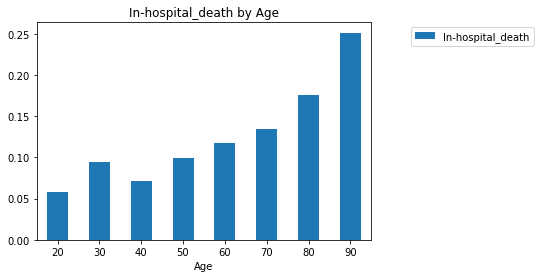

In [104]:
dx = df2.plot.bar(x="Age" , y=["In-hospital_death"], rot=0)
dx.set_title("In-hospital_death by Age",color='black')
dx.legend(bbox_to_anchor=(1.5, 1.0))

# for p in dx.patches:
#     dx.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

dx.plot()

In [18]:
df2 = df_round.groupby(['Age'])['Glucose_first','Glucose_median','Glucose_last'].mean().reset_index()
df2['Glucose_first'] = np.around(df2['Glucose_first'], 2)
df2['Glucose_median'] = np.around(df2['Glucose_median'], 2)
df2['Glucose_last'] = np.around(df2['Glucose_last'], 2)
df2

C:\Users\simon\AppData\Local\Temp/ipykernel_20456/521638784.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df_round.groupby(['Age'])['Glucose_first','Glucose_median','Glucose_last'].mean().reset_index()


,Age,Glucose_first,Glucose_median,Glucose_last
0,20,138.32,123.22,121.09
1,30,158.47,127.86,126.08
2,40,136.60,124.70,121.47
3,50,148.92,132.95,128.52
4,60,152.78,136.92,130.42
5,70,150.14,137.92,133.81
6,80,152.25,135.05,128.65
7,90,147.07,128.56,122.79


<AxesSubplot:xlabel='Age'>

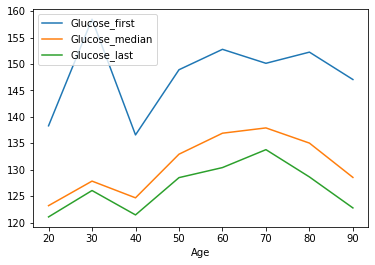

In [19]:
df2.plot(x="Age")

In [20]:
# Recomendation: check for alive patients who have high last glucose copmaring to the Glucose median

In [112]:
high_gloucose = df[df['Glucose_last']>df['Glucose_last'].median()]
high_gloucose = high_gloucose[high_gloucose['In-hospital_death'] == 0]
high_gloucose = high_gloucose[high_gloucose['Survival'] != -1]
high_gloucose = high_gloucose.sort_values(by=['Glucose_last'], ascending=False)
high_gloucose = high_gloucose[['recordid', 'Age', 'Gender', 'bmi', 'Glucose_last']]

high_gloucose

,recordid,Age,Gender,bmi,Glucose_last
3427,141233,57,Female,27.375,405.0
462,133714,67,Female,27.375,351.0
2364,138505,76,Female,34.440,344.0
2604,139126,77,Male,27.375,337.0
673,134256,45,Male,27.375,337.0
...,...,...,...,...,...
2728,139427,84,Male,20.920,122.0
1676,136813,58,Male,30.300,122.0
2876,139781,77,Male,27.375,122.0
547,133960,70,Female,27.375,122.0
